In [2]:
import pandas as pd
import numpy as np
import datetime
import pandas_profiling
import seaborn as sns
import matplotlib.pylab as plt

# Exploratory Data Analysis (EDA) 

In [3]:
pathGB = '../../data/raw/GB_youtube_trending_data.csv'
pathCA = '../../data/raw/CA_youtube_trending_data.csv'
pathUS = '../../data/raw/US_youtube_trending_data.csv'

In [ ]:
data = ['CA','GB','US']

from scripts import project_functions # This is called a relative import
df = project_functions.load_and_process(data)
df

In [ ]:
def load_and_process (data):
    
    country = data
    df = pd.DataFrame()
    df1 = pd.DataFrame()

    for c in country:
        df1 = pd.read_csv('../../data/raw/'+ c +'_youtube_trending_data.csv',parse_dates= ['trending_date','publishedAt'])
        df1['country']= c
        df = pd.concat([df,df1])
    
        #change the datetime
    df["trending_date"] = df.apply(lambda row: pd.to_datetime(row["trending_date"]), axis=1)
    df["publishedAt"] = df.apply(lambda row: pd.to_datetime(row["publishedAt"]), axis=1)

        #category ID dictionary
    category_replace = {
              1:'Film & Animation',
              2:'Autos & Vehicles',
              10:'Music',
              15:'Pets & Animals',
              17:'Sports',
              19:'Travel & Events', 
              20:'Gaming',
              21:'Videoblogging',
              22: "People & Blogs",
              23: "Comedy", 
              24: "Entertainment",
              25: "News & Politics", 
              26: "Howto & Style", 
              27: "Education", 
              28: "Science & Technology",
              29: 'NaN'
        }

        #clean the dataset
    df_clean = (
            pd.DataFrame(data=df)
            .drop(columns = ['thumbnail_link','comments_disabled','ratings_disabled','description','title','channelId'])
            .replace({"categoryId":category_replace})
            .drop(df[df['categoryId']=='NaN'].index).sort_values('trending_date')
            .reset_index().drop(columns = ['index'])
    )
        
    df_last = (
        pd.DataFrame(data=df_clean)
        .drop_duplicates(['video_id'], keep='last').reset_index().drop(columns = 'index')
        )
        
    return df_last

In [4]:
# load into single
df = pd.concat([pd.read_csv(pathCA),
                pd.read_csv(pathGB),
                pd.read_csv(pathUS)])

#change the datetime
df["trending_date"] = df.apply(lambda row: pd.to_datetime(row["trending_date"]), axis=1)
df["publishedAt"] = df.apply(lambda row: pd.to_datetime(row["publishedAt"]), axis=1)

In [5]:
#category ID dictionary
category_replace = {
      1:'Film & Animation',
      2:'Autos & Vehicles',
      10:'Music',
      15:'Pets & Animals',
      17:'Sports',
      19:'Travel & Events', 
      20:'Gaming',
      21:'Videoblogging',
      22: "People & Blogs",
      23: "Comedy", 
      24: "Entertainment",
      25: "News & Politics", 
      26: "Howto & Style", 
      27: "Education", 
      28: "Science & Technology",
      29: 'NaN'
    }

In [6]:
#clean the dataset
df_clean = df.drop(columns = ['thumbnail_link','comments_disabled','ratings_disabled','description','title','channelId'])
df_clean = df_clean.replace({"categoryId":category_replace}).rename(columns= {'categoryId':'category'})
df_clean = df_clean.drop(df_clean[df_clean['category']=='NaN'].index).sort_values('trending_date')
df_clean = df_clean.reset_index().drop(columns = ['index'])
df_clean

,video_id,publishedAt,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count
0,KX06ksuS6Xo,2020-08-11 07:30:02+00:00,Diljit Dosanjh,Music,2020-08-12 00:00:00+00:00,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059
1,6IN4ZcZAUbA,2020-08-10 12:00:03+00:00,Vox,News & Politics,2020-08-12 00:00:00+00:00,Vox.com|vox|explain|explainer|colombia|climate...,1127988,41715,1359,4909
2,tbsu-AWH-C0,2020-08-10 16:15:11+00:00,Stephen Sharer,Music,2020-08-12 00:00:00+00:00,Stephen Sharer|Share The Love|Steven Share|Car...,823262,24171,3573,5204
3,yqpnJFga4cA,2020-08-09 18:00:20+00:00,Footasylum,Entertainment,2020-08-12 00:00:00+00:00,chunkz|filly|chunkz and filly|spuddz|footasylu...,351585,23122,151,978
4,Xrm6TKrPkMo,2020-08-09 17:00:06+00:00,Brandonio,Entertainment,2020-08-12 00:00:00+00:00,brandonio|brandonio sister|user friendly|brand...,252844,17555,256,1709
...,...,...,...,...,...,...,...,...,...,...
43668,maVWvNkhgpM,2020-10-18 21:26:20+00:00,Tessa Brooks,People & Blogs,2020-10-23 00:00:00+00:00,Tessa Brooks|BrookstersMartinez|twins|Lucas an...,1785634,79751,3014,4161
43669,jadyZfdxX4I,2020-10-19 21:00:42+00:00,Young MA,Music,2020-10-23 00:00:00+00:00,youngma|young m.a|Young M.A.|dripset|ooouuu|pe...,754972,52130,1308,3499
43670,-CWPIgK4G-k,2020-10-20 04:00:00+00:00,Pamela Reif,Sports,2020-10-23 00:00:00+00:00,workout|training|butt|glute|booty|ass|legs|mus...,455972,16496,324,1030
43671,iCJsYBtFJzs,2020-10-18 19:00:08+00:00,The ACE Family,People & Blogs,2020-10-23 00:00:00+00:00,alaia's 2nd birthday party special|the ace fam...,4642666,243463,8961,7645


*In the dataset, a video_id has one publish date and mutiple trending dates.
I would like to keep each video to have only one record so that we can define which types of video is most popular.*

In [7]:
#drop the duplicate video and keep the video with the last trending_date
#df_lastdate = df_clean[df_clean['video_id']=='KX06ksuS6Xo']
df_lastdate = df_clean.drop_duplicates(['video_id'], keep='last').reset_index().drop(columns = 'index')

df_lastdate

,video_id,publishedAt,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count
0,uRUh9Ucr_yg,2020-08-10 23:10:13+00:00,BT Sport,Sports,2020-08-12 00:00:00+00:00,europa league|man utd copenhagen|man utd highl...,772339,10381,517,2466
1,WGvdHPfwD-k,2020-08-11 22:19:01+00:00,BT Sport,Sports,2020-08-12 00:00:00+00:00,bt sport|bt sport official|wolves|wolves sevil...,313473,5249,129,1114
2,AdWLrHcnC5I,2020-08-11 22:56:27+00:00,BT Sport,Sports,2020-08-12 00:00:00+00:00,bt sport|bt sport official|bt sport football|b...,156639,2593,47,402
3,C_5aEQB1KUk,2020-08-09 07:07:51+00:00,TheWeasle,Sports,2020-08-12 00:00:00+00:00,ufc|derrick lewis|derrick lewis knockout|derri...,125795,2828,99,587
4,RKwW1_EUVkc,2020-08-08 19:00:02+00:00,Tyrrell's Classic Workshop,Autos & Vehicles,2020-08-12 00:00:00+00:00,Iain Tyrrell|Tyrrell's Classic Workshop|Classi...,71068,6527,23,979
...,...,...,...,...,...,...,...,...,...,...
5387,maVWvNkhgpM,2020-10-18 21:26:20+00:00,Tessa Brooks,People & Blogs,2020-10-23 00:00:00+00:00,Tessa Brooks|BrookstersMartinez|twins|Lucas an...,1785634,79751,3014,4161
5388,jadyZfdxX4I,2020-10-19 21:00:42+00:00,Young MA,Music,2020-10-23 00:00:00+00:00,youngma|young m.a|Young M.A.|dripset|ooouuu|pe...,754972,52130,1308,3499
5389,-CWPIgK4G-k,2020-10-20 04:00:00+00:00,Pamela Reif,Sports,2020-10-23 00:00:00+00:00,workout|training|butt|glute|booty|ass|legs|mus...,455972,16496,324,1030
5390,iCJsYBtFJzs,2020-10-18 19:00:08+00:00,The ACE Family,People & Blogs,2020-10-23 00:00:00+00:00,alaia's 2nd birthday party special|the ace fam...,4642666,243463,8961,7645


In [7]:
profiling = pandas_profiling.ProfileReport(df_clean)
profiling

# Heatmap for Major Trending Stats

In [14]:
df_lastdate = df_lastdate[~(df_lastdate[['likes']] == 0).any(axis=1)]
df_assign = df_lastdate.assign(log_likes=np.log(df_lastdate['likes']))

In [15]:
df_assign2 = df_assign.assign(log_views=np.log(df_assign['view_count']))
df_assign3 = df_assign2.assign(log_dislikes=np.log(df_assign['dislikes']))
df_assign3 = df_assign3.assign(log_comment=np.log(df_assign['comment_count']))
df_assign3 = df_assign3.loc[~(df_assign3==0).all(axis=1)]
df_assign3 = df_assign3.replace([np.inf, -np.inf], np.nan).dropna(how="all")
df_assign3 = df_assign3.drop(columns = ['view_count','likes','dislikes','comment_count'])

C:\Users\skate\miniconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

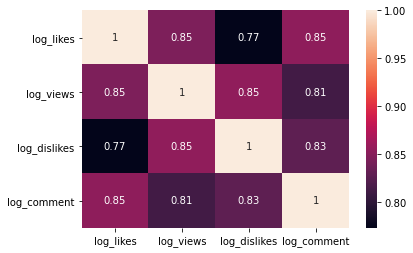

In [16]:
sns.heatmap(df_assign3.corr(), annot = True)

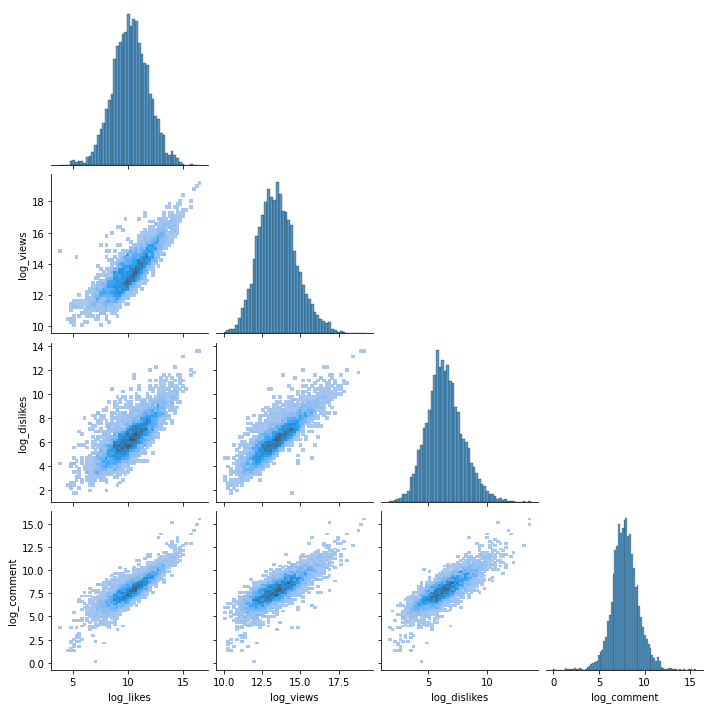

In [19]:
sns.pairplot(df_assign3, corner=True, kind="hist")

# Logged lmplot for log_likes against log_views

In [21]:
df_lastdate = df_lastdate[~(df_lastdate[['likes']] == 0).any(axis=1)]
df_assign = df_lastdate.assign(log_likes=np.log(df_lastdate['likes']))

In [22]:
df_assign2 = df_assign.assign(log_views=np.log(df_assign['view_count']))

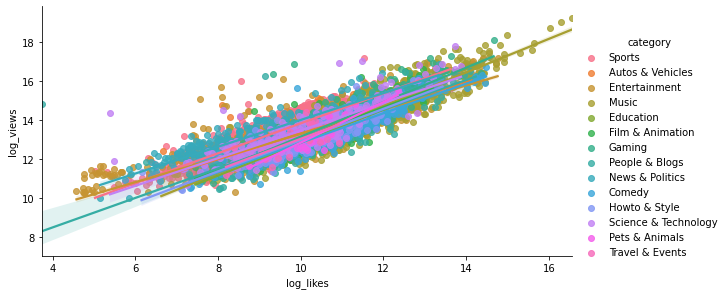

In [23]:
sns.lmplot(x="log_likes", y="log_views",hue="category", data=df_assign2, height=4, aspect=2, palette="husl")

# Logged Violin Plot for likes against category

In [24]:
df_lastdate = df_lastdate[~(df_lastdate[['likes']] == 0).any(axis=1)]
df_assign = df_lastdate.assign(log_likes=np.log(df_lastdate['likes']))

<AxesSubplot:xlabel='log_likes', ylabel='category'>

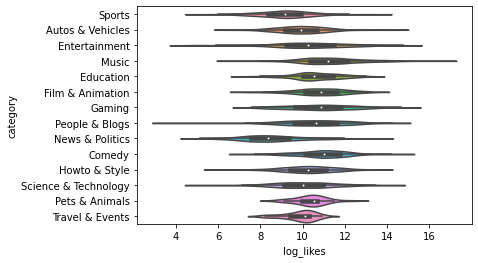

In [25]:
sns.violinplot(x="log_likes", y="category", data=df_assign)